## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Convolutional Neural Networks



**By the end of the lesson, you should be able to:**
- Identify use cases for convolutional neural networks and when they are superior to other neural networks.
- Describe convolutional and pooling layers.
- Define padding and filters.
- Fit CNNs in Keras.
- Use transfer learning for real world image classification tasks!
- Intuiton Deck is here: [Link](https://docs.google.com/presentation/d/1FiwVBKFULaDaEa194XvqoQuHDBHRAeNSADGzqSRy6b8/edit?usp=sharing)

# MNIST Handwritten Digits dataset
- Convolutional neural networks are generally used when we are dealing with image data. They can absolutely be used for NLP as well!
- Their main advantage over densely connected neural networks is the ability to capture spatial information.
- There are many versions of mnist
    - MNIST Original Digits: [Link](https://paperswithcode.com/dataset/mnist)
    - Fashion MNIST: [Link](https://www.kaggle.com/zalando-research/fashionmnist)
    - Chinese MNIST: [Link](https://www.kaggle.com/gpreda/chinese-mnist)
    
- Today we'll be working with the original MNIST handwritten digits dataset
![](../images/MnistExamples.png)

In [ ]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

In [1]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


In [4]:
# Check one value of X_train.
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
def plot_digit(X, y):
    plt.imshow(X, cmap="gray")
    plt.title(f'Label: {y}')

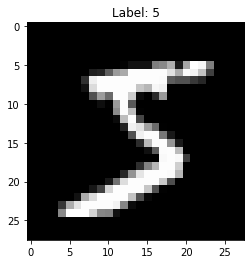

In [6]:
plot_digit(X_train[0], y_train[0])

<img src="../images/picture.png" alt="drawing" width="400"/>

[Image by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [7]:
# The current range of X_train and X_test is 0 to 255.
# This scales each value to be between 0 and 1.
X_train = X_train/255.
X_test = X_test/255.

In [8]:
# Take a look at y_train
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

<details><summary>What change do I need to make to y_train? Why?</summary>

- Right now, the values of `y_train` will be interpreted as a number. That means, if instead of `5`, we predict `4`, it will be treated as **better** than if we predict `1`. But this is not what we want. We want all inaccurate predictions to be treated equally. In other words, our y is a categorical variable!
- We need to one hot encode it.
</details>

In [9]:
# Change y_train.
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
# Check y_train again
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Let's fit a feedforward neural network to this data.
- Our image is black and white so only 1 channel
- But it's still in 2D!
- Let's flatten the image to make it a 1D vector so that our feed forward neural network can process it

<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png" alt="drawing" width="400"/>

<img src="../images/picture.png" alt="drawing" width="400"/>

<img src="../images/network.png" alt="drawing" width="400"/>

[Images by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

In [11]:
model = Sequential()

# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers. We need to specify the input shape.
model.add(Flatten(input_shape=(28, 28, 1)))

# Let's create a fully-connected, feed-forward neural net with:
# - A 128-node hidden layer.
# - A 32-node hidden layer.
# - The appropriate output layer (multiclass classification)
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


<details><summary>How many parameters are being fit in this model?</summary>

- The input to the first hidden layer is $784$ nodes $+1$ bias. And the layer has $128$ nodes. Thus number of parameters for first hidden layer is $785*128=100480$ parameters.
- The input to the second hidden layer is $128$ nodes $+1$ bias. And the layer has $32$ nodes. Thus number of parameters for second hidden layer is $129*32=4128$ parameters.
- The input to the output layer is $32$ nodes $+1$ bias. And the layer has $10$ nodes. Thus number of parameters for output layer is $33*10=330$ parameters.

</details>

<details><summary>What are some consequences of fitting a model with too many parameters?</summary>

- Easy to overfit our model.
- Learning is quite slow.
- We need more data in order to meaningfully learn and fit a model!
</details>

In [12]:
# Compile model.
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)

Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.4600 - accuracy: 0.8698 - val_loss: 0.2138 - val_accuracy: 0.9375
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1833 - accuracy: 0.9470 - val_loss: 0.1474 - val_accuracy: 0.9558
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1342 - accuracy: 0.9610 - val_loss: 0.1199 - val_accuracy: 0.9622
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1064 - accuracy: 0.9687 - val_loss: 0.1091 - val_accuracy: 0.9656
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0870 - accuracy: 0.9735 - val_loss: 0.0992 - val_accuracy: 0.9695
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0884 - val_accuracy: 0.9721
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0611 - accuracy: 0.9824 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 

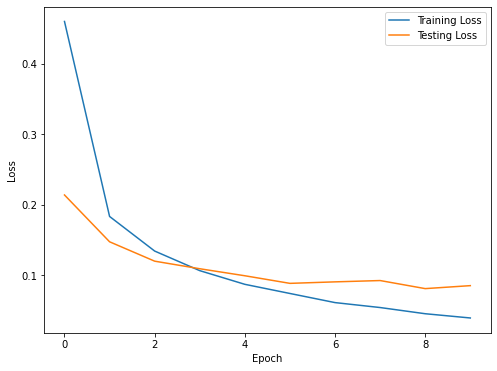

In [14]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

<details><summary>If my model were to be underfit, what might I do?</summary>

- Increase the learning rate.
- Increase the number of layers.
- Increase the number of nodes in each layer.
- Decrease the batch size.
- Increase the number of epochs.
</details>

In [15]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9736


In [16]:
# Show model performance.
labels = model.metrics_names
print(f'{labels[0]}: {score[0]:.4f}')
print(f'{labels[1]}: {score[1]:.4f}')

loss: 0.0852
accuracy: 0.9736


## Convolutional Neural Networks
Convolutional neural networks are a great way to get around this issue of too many parameters. CNNs do some complicated math up front to "compress our images," allowing us to learn far fewer parameters in later layers.

A CNN will generally consist of three types of layers:
- Convolutional Layer
- Pooling Layer
- Densely Connected Layer

<img src="../images/cnn.jpeg" alt="drawing" width="600"/>

[Image source.](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

This isn't overly helpful if we're trying to learn what CNNs are/do.

<img src="../images/pic1.png" alt="drawing" width="400"/>

<img src="../images/pic2.png" alt="drawing" width="400"/>

<img src="../images/pic3.png" alt="drawing" width="400"/>

<img src="../images/pic4.png" alt="drawing" width="400"/>

[Image by 3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

### Let's fit a convolutional neural network to this data.

In [17]:
# Instantiate a CNN model.
cnn_model = Sequential()

In [18]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters=20,          # number of filters
                     kernel_size=(3, 3),  # height/width of filter
                     padding='same',      # Ensure Output is same shape as Input
                     activation='relu',   # activation function 
                     input_shape=(28, 28, 1))) # shape of input (image)


We have to specify the input shape in our first layer

In [19]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling

In [20]:
# Add another Conv2D and pooling layers
cnn_model.add(Conv2D(filters=10,
                     kernel_size = (3, 3),
                     padding='same',
                     activation='relu'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling

In [21]:
# Flatten to a single vector
cnn_model.add(Flatten())

In [22]:
# Add some fully connected layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# Check out the model summary.
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 10)        1810      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 490)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [23]:
# Compile model.
opt = Adam(learning_rate=0.001)
cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10)

Epoch 1/10
235/235 [==============================] - 22s 89ms/step - loss: 0.4885 - accuracy: 0.8625 - val_loss: 0.1450 - val_accuracy: 0.9583
Epoch 2/10
235/235 [==============================] - 21s 88ms/step - loss: 0.1209 - accuracy: 0.9636 - val_loss: 0.0854 - val_accuracy: 0.9745
Epoch 3/10
235/235 [==============================] - 21s 89ms/step - loss: 0.0831 - accuracy: 0.9740 - val_loss: 0.0611 - val_accuracy: 0.9810
Epoch 4/10
235/235 [==============================] - 21s 91ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0540 - val_accuracy: 0.9822
Epoch 5/10
235/235 [==============================] - 23s 96ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 6/10
235/235 [==============================] - 21s 88ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0417 - val_accuracy: 0.9857
Epoch 7/10
235/235 [==============================] - 21s 91ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0414 - val_accuracy:

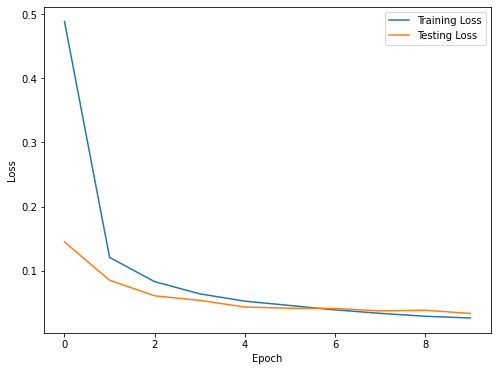

In [25]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [26]:
# Evaluate model on test data.
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

313/313 [==============================] - 2s 5ms/step - loss: 0.0337 - accuracy: 0.9882


In [27]:
# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

CNN loss  : 0.03365369513630867
CNN accuracy   : 0.9882000088691711

FFNN loss : 0.08515208214521408
FFNN accuracy  : 0.9735999703407288


### Convolution Layer

The convolution layer is where we pass a filter over an image and do some calculation at each step. Specifically, we take pixels that are close to one another, then summarize them with one number. The goal of the convolution layer is to identify important features in our images, like edges.

<img src="../images/convolution.gif" alt="drawing" width="550"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

Our hyperparameters here are:
- the number of filters to use. This is given by `filters = 20`.
- the dimensions of the filter. This is given by `kernel_size = (3, 3)`. a 3 x 3 filter

**How many filters should we use?** Well, this is a hyperparameter. There's not one great answer, but the idea is that each filter can detect one type of feature in an image (like vertical edges). This may depend on the complexity of your images (simpler images require fewer filters) and usually requires trial and error to identify an adequate value of `filters`. [Source](https://stats.stackexchange.com/questions/196646/what-is-the-significance-of-the-number-of-convolution-filters-in-a-convolutional)

#### Padding

When we pass a filter over an image, each of the "inside" pixels is counted pretty frequently and thus gets "represented" more in the final model output.

<details><summary>How many times does each corner get included in the "output?"</summary>

- Right now, each corner gets included only once.
</details>

We can use **padding** to add a border of white cells around the edge of the image. This will allow pixels on the edge/in the corner to be included more frequently. (This might be good when doing computer vision for self-driving vehicles!)

<details><summary>In this MNIST digits case, do you think padding is a good idea or a bad idea?</summary>

- Padding is probably a bad idea here. We're increasing the number of parameters we need to learn, but it's unlikely that we're getting important data from the corners/edges of the image. 
</details>

[Let's visualize what the convolution operation looks like](https://ezyang.github.io/convolution-visualizer/).

### Pooling Layer

Remember that CNNs learn far fewer parameters than a regular feed-forward neural network. Most of the "parameter reduction" comes from the pooling layer.

<img src="../images/maxpool.png" alt="drawing" width="400"/>

[Image source.](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

In Max Pooling, we pass a filter over an image. At each step, we take the maximum value and record it as part of the output.
- Average Pooling exists, but is far less frequently used. [Andrew Ng](https://www.deeplearning.ai/deep-learning-specialization/) recommends using Max Pooling.
- When pooling, we generally partition the result from the previous layer. That is, the filter does not usually overlap like it does in the convolutional layer.

Our hyperparameters here are the **dimensions of the filter we use when pooling**. This is given by `pool_size = (2, 2)` in our example.

##### Why use max pooling?
1. Reduces the data dimensionality.
2. Protects against overfitting by creating a more abstract representation.
3. Provides some invariance by ignoring insignificant local changes in the image.

### Densely-Connected Layer
The densely-connected layer is the exact same as in a normal feed-forward neural network, so we won't spend any time talking about that, **except: remember to pass a `Flatten()` layer before a `Dense()` layer!**

# Transfer Learning
- Neural Network models have the capability of "transfering" knowledge from one model to another
- For example, we can train a `parent` model on a very large dataset like Imagenet to identify 1000 real world objects.
- This "knowledge" that this `parent` model has learned, can then be "transfered" to another `child` model to identify between dogs and cats, even though dogs and cats may not be part of the original 1000 real world objects the `parent` model was trained on!
- The reason why this works is because real world object have many similar features. For example, eyes, ears, face, hands, legs, etc are common in many animals. Once the `parent` model learns how to identify an eye or a leg, it can do so even on animals that it has not seen before!


- Tensorflow Keras provides a lot of models pretrained on the Imagenet dataset: [Link](https://www.tensorflow.org/api_docs/python/tf/keras/applications)
- Some of the popular ones are `efficientnet` family, `mobilenet_v2` and `resnet50`
- Let's see how we can use one of these "pre-trained" models in an image classification model
- Dataset is from here: [Link](https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip). Download and unzip the file into the data directory
- For more information on how to choose a specific pre-trained model take a look at this Medium post: [Link](https://medium.com/towards-data-science/how-to-choose-the-best-keras-pre-trained-model-for-image-classification-b850ca4428d4)

In [28]:
# Import the necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [31]:
# Load the Train and Validation data
train_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('../data/cats_and_dogs_filtered/train/', 
                                                                                             target_size=(224,224), 
                                                                                             class_mode='binary'
                                                                                            )

val_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('../data/cats_and_dogs_filtered/validation/', 
                                                                                           target_size=(224,224), 
                                                                                           class_mode='binary'
                                                                                          )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# Check the output mappings
class_mappings = train_data.class_indices
print(class_mappings)

{'cats': 0, 'dogs': 1}


In [33]:
# Import the desired pre-trained model
# List of pre-trained models: https://www.tensorflow.org/api_docs/python/tf/keras/applications
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')

# Freeze the model so we don't accidentally change the pre-trained model
pre_trained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [35]:
# Create our model architecture
trf_model = Sequential()

# Then add the pre-trained model to use Transfer Learning
trf_model.add(pre_trained_model)

# Finally add our custom modifications
trf_model.add(Dense(1, activation='sigmoid'))

trf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [36]:
# Compile the model
opt = Adam(learning_rate=0.001)
trf_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [37]:
# Fit model on training data
history = trf_model.fit(train_data, 
                        batch_size=64,
                        validation_data=val_data,
                        epochs=5,
                       )

Epoch 1/5
63/63 [==============================] - 78s 1s/step - loss: 0.2514 - accuracy: 0.9130 - val_loss: 0.0933 - val_accuracy: 0.9770
Epoch 2/5
63/63 [==============================] - 74s 1s/step - loss: 0.0751 - accuracy: 0.9815 - val_loss: 0.0657 - val_accuracy: 0.9850
Epoch 3/5
63/63 [==============================] - 79s 1s/step - loss: 0.0553 - accuracy: 0.9855 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 4/5
63/63 [==============================] - 79s 1s/step - loss: 0.0455 - accuracy: 0.9890 - val_loss: 0.0505 - val_accuracy: 0.9820
Epoch 5/5
63/63 [==============================] - 79s 1s/step - loss: 0.0372 - accuracy: 0.9915 - val_loss: 0.0476 - val_accuracy: 0.9870


In [38]:
# Save the model
trf_model.save('cats_vs_dogs.h5')

C:\Users\cheon\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


## Make Predictions on the saved model

In [39]:
# Import necessary libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
# Load the saved model
trf_model = load_model('cats_vs_dogs.h5')

In [42]:
# Load the image into Python
test_image = image.load_img('../images/test.jpg')

# Convert the image to a matrix of numbers
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

In [43]:
# Make predictions
result = trf_model.predict(test_image)
print(result)

[[0.7246513]]


In [44]:
# Convert the probability to actual predictions
['Dog' if pred[0]>0.5 else 'Cat' for pred in result]

['Dog']

## Conclusion

Convolutional neural networks are uniquely suited to tackle image data.
- Dealing with images usually presents high-dimensional challenges. (A 28x28 image is a pretty low-resolution image.)

<details><summary>Why are convolutional neural networks better equipped to handle image data than non-CNNs?
</summary>

- CNNs are naturally set up to consider interactions among "close pixels" only and can drastically cuts down the number of parameters needed to learn. (Or get better performance for a given number of parameters!)
</details>

<details><summary>Can you think of other situations (i.e. not images) in which we might apply a convolutional neural network?</summary>

- **Videos**. A video is really just a sequence of pictures, so we might use a 3D convolutional neural network. (Length of the picture, width of the picture, and depth of the picture is time.)
- **Time series data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring time periods in time series data?
- **Natural language data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring words or tokens in natural language data?
- Convolutional neural networks exploit the inherent structure in data we pass in.
</details>

- Transfer learning is a really fantastic way to use knowledge from models trained by other companies and researchers for our own projects
- Many of you are using Huggingface for your capstone projects. That is using Transfer learning for NLP!